# **Importing Libraries**

Importing necessary libraries and cloning the Git Repo of Yolov3 in pytorch

In [0]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/ayooshkathuria/pytorch-yolo-v3.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install dependencies
  !git clone -q $git_repo_url
  #!cd $project_name && pip install -q -r requirement.txt
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

# **Mount google drive**

Mounting google drive is required to gain access to the required files used for this inference.

In [0]:
## Start by connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Getting the image URL**

This image is used for detection

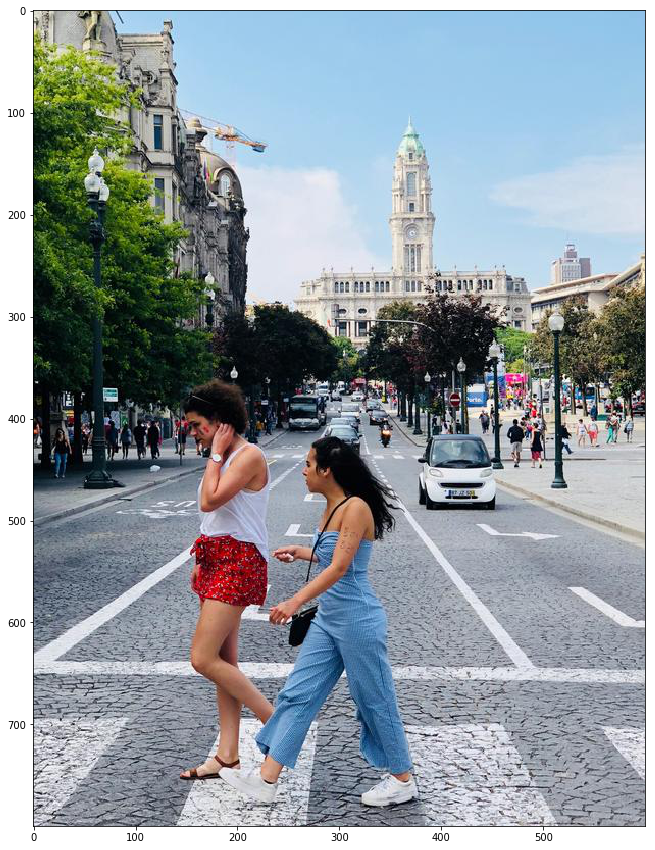

In [0]:
IMAGE_URL = 'https://i.postimg.cc/02pvdYwM/ancient-architecture-buildings-1583704.jpg'

image_file = basename(IMAGE_URL)
!wget -q -O $image_file $IMAGE_URL
plt.figure(figsize=(15, 15))
plt.imshow(matplotlib.image.imread(image_file))

# **Running the inference of pre-trained model**

The above specified image is passed to pre-trained model and weights of YOLOv3 which is locaaly stored in my google drive.

In [0]:

!cd pytorch-yolo-v3 && python detect.py --cfg 'cfg/yolov3.cfg' --weights '../gdrive/My Drive/Machine Learning/yolov3.weights' --images ../$image_file --det ..



Loading network.....
Network successfully loaded
ancient-architecture-buildings-1583704.jpg predicted in  1.280 seconds
Objects Detected:    person person person person person person person person person person person person person person car car truck clock
----------------------------------------------------------

SUMMARY
----------------------------------------------------------
Task                     : Time Taken (in seconds)

Reading addresses        : 0.000
Loading batch            : 1.618
Detection (1 images)     : 1.331
Output Processing        : 0.000
Drawing Boxes            : 0.019
Average time_per_img     : 2.969
----------------------------------------------------------


# **Result**

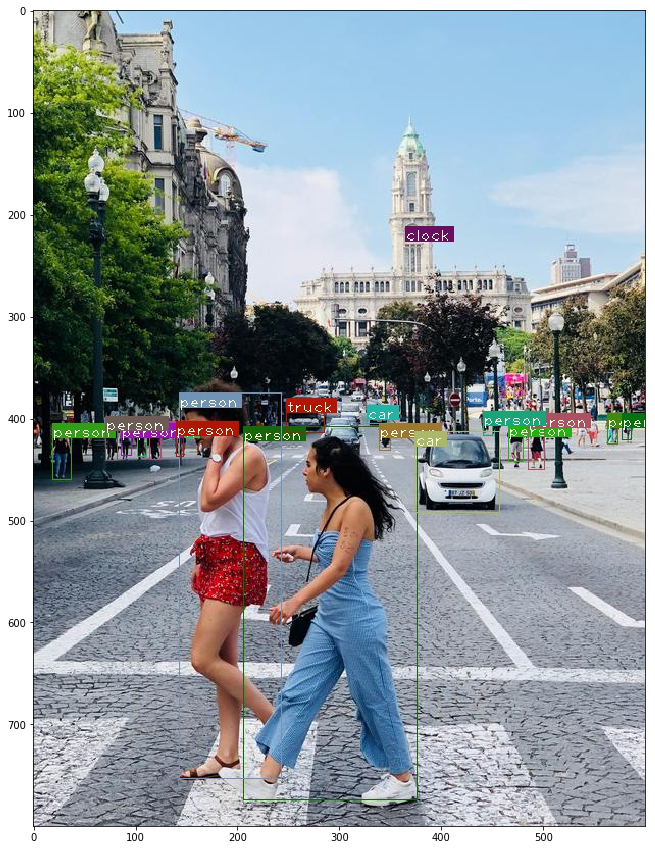

In [0]:
plt.figure(figsize=(15, 15))
plt.imshow(matplotlib.image.imread('det_%s' % image_file))